In [12]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math
%matplotlib inline

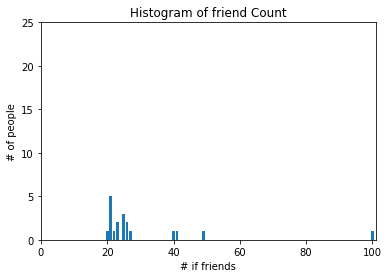

In [13]:
num_friends = [100, 49, 41, 40, 25, 25, 25, 26, 27, 26, 
               23, 23, 22, 21, 21, 21, 21, 21, 20]
friend_count = Counter(num_friends)
xs = range(101)
ys = [friend_count[x] for x in xs]

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title('Histogram of friend Count')
plt.xlabel('# if friends')
plt.ylabel('# of people')
plt.show()

Simple stats

In [5]:
num_points = len(num_friends)
largest = max(num_friends)
smallest = min(num_friends)

Central Tendencies

In [8]:
def mean(x):
    return sum(x) / len(x)


def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint + 1
        return (sorted_v[lo] + sorted_v[hi]) /2
    
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

[21]


Dispertion

In [14]:
def data_range(x):
    return max(x) - min(x)


def de_mean(x):
    """Normalization"""
    m = mean(x)
    return [x_i - m for x_i in x]
    
    
def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum([d ** 2 for d in deviations]) / (n - 1)


def std_deviation(x):
    return math.sqrt(variance(x))


def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)


def covariance(x, y):
    n = len(x)
    return sum([xi * yi for xi, yi in zip(x, y)]) / (n - 1)


def correlation(x, y):
    stdev_x = std_deviation(x)
    stdev_y = std_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y ) / stdev_x / stdev_y
    else:
        return 0